In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv("insurance_pre.csv")

In [4]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [139]:
dataset.shape

(1338, 6)

In [5]:
#Rows and Columns
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB
None


In [6]:
print(len(dataset))

1338


In [6]:
#Pre-Processing Method
dataset=pd.get_dummies(dataset,drop_first=True)

In [7]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [8]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [9]:
independent=dataset[['age', 'bmi', 'children',  'sex_male', 'smoker_yes']]

In [10]:
Dependent=dataset[['charges']]

In [12]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [13]:
Dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,Dependent,test_size=0.30,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression   
regressor=LinearRegression()                       
regressor.fit(x_train,y_train) 

LinearRegression()

In [16]:
Weight=regressor.coef_
Weight

array([[  257.8006705 ,   321.06004271,   469.58113407,   -41.74825718,
        23418.6671912 ]])

In [17]:
bias=regressor.intercept_
bias

array([-12057.244846])

In [18]:
y_pred=regressor.predict(x_test)

In [19]:
from sklearn.metrics import r2_score   
r_score=r2_score(y_test,y_pred)

In [20]:
r_score

0.7894790349867009

In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random',max_features='log2')
regressor=regressor.fit(x_train,y_train)  

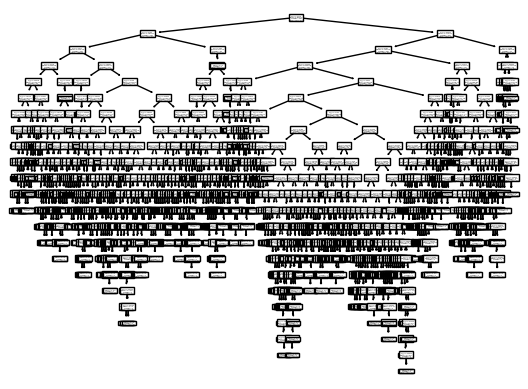

In [189]:
import matplotlib.pyplot as plt                   #Matplotlib is used for graph purpose
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [190]:
y_pred=regressor.predict(x_test)

In [191]:
from sklearn.metrics import r2_score   #y_test =output#y_pred-AI Brain Prediction
r_score=r2_score(y_test,y_pred)

In [192]:
r_score

0.6872858000625528

In [135]:
from sklearn.ensemble import RandomForestRegressor
#regressor=RandomForestRegressor(n_estimators=50,random_state=0)#n_estimators=50,random_state=0
#regressor=RandomForestRegressor(criterion='poisson',max_features='log2')
regressor=RandomForestRegressor(n_estimators=100,random_state=0,min_samples_leaf=1,min_weight_fraction_leaf=0.0,criterion='poisson',max_features='sqrt')
regressor.fit(x_train,y_train)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9076\1881082220.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train,y_train)


RandomForestRegressor(criterion='poisson', max_features='sqrt', random_state=0)

In [136]:
y_pred=regressor.predict(x_test)

In [137]:
from sklearn.metrics import r2_score   #y_test =output#y_pred-AI Brain Prediction
r_score=r2_score(y_test,y_pred)

In [138]:
r_score

0.8680156984764337

In [140]:
import pickle
filename="Random_Forest_Insurance_Regression.sav"
pickle.dump(regressor,open(filename,'wb'))

In [141]:
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.predict([[19,27.900,0,0,1]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [142]:
result

array([17343.3896405])